<a href="https://colab.research.google.com/github/PamelaCSilva/MulheresNosQuadrinhos/blob/main/Mulheres_nos_Quadrinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mulheres nos Quadrinhos Mainstream

Representatividade é um tema em alta nos últimos anos e tem se mostrado um assunto complexo e cada vez mais exigido na sociedade que clama por diversidade explícita na mídia.

Naturalmente essa necessidade chegaria nos quadrinhos e as duas maiores editoras conhecidas no mercado, DC Comics e Marvel vem fazendo um esforço para diversificar seu universo e também seu público! Se estão fazendo tal tarefa efetivamente é conversa para outro dia, aqui veremos o quão diverso o universo de ambas editoras era antes desse tópico se tornar tão discutido.

## Com que dados estamos trabalhando?
Para essa pesquisa estou usando as fontes de dados usadas pela [FiveThirtyEight](https://fivethirtyeight.com/) em seu artigo [Comic Books Are Still Made By Men, For Men And About Men](https://fivethirtyeight.com/features/women-in-comic-books/). 

São fontes de dados bem simples, contendo informações básicas sobre todos os personagens criados pelas duas editoras desde que foram fundadas até 2013. Infelizmente essas fontes de dados não tem informações sobre cor e nacionalidade dos personagens, por isso essas métricas estão de fora e focaremos apenas no gênero e sexualidade que são as informações mais relevantes que temos.

Expanda as duas células ocultas abaixo caso queira ver como são as bases de dados.


In [1]:
import pandas as pd #Preciso dessa lib para ler a fonte de dados
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Lib para legendas dos gráficos
from matplotlib.cm import get_cmap

#Definindo a variável "fonteDC" para guardar as informações da fonte de dados dos personagens da DC
fonteDC = "https://github.com/fivethirtyeight/data/blob/master/comic-characters/dc-wikia-data.csv?raw=true" 

#Definindo a variável "fonteDC" para guardar as informações da fonte de dados dos personagens da Marvel
fonteMarvel = "https://github.com/fivethirtyeight/data/blob/master/comic-characters/marvel-wikia-data.csv?raw=true"

dadosDC = pd.read_csv(fonteDC) #Tornando a fonte de dados visível em nossa pesquisa
dadosMarvel = pd.read_csv(fonteMarvel) #Tornando a fonte de dados visível em nossa pesquisa

dadosDC.head() #Mostrando os 5 primeiros registros da fonte de dados da DC

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [2]:
dadosDC.iat[1,12] = 1938.0
dadosDC.iat[1,11] = "1938, October"
dadosDC.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1938, October",1938.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [3]:
dadosMarvel.head() #Mostrando os 5 primeiros registros da fonte de dados da Marvel

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Onde tem mais mulheres?

Text(0.5, 0, 'Gênero')

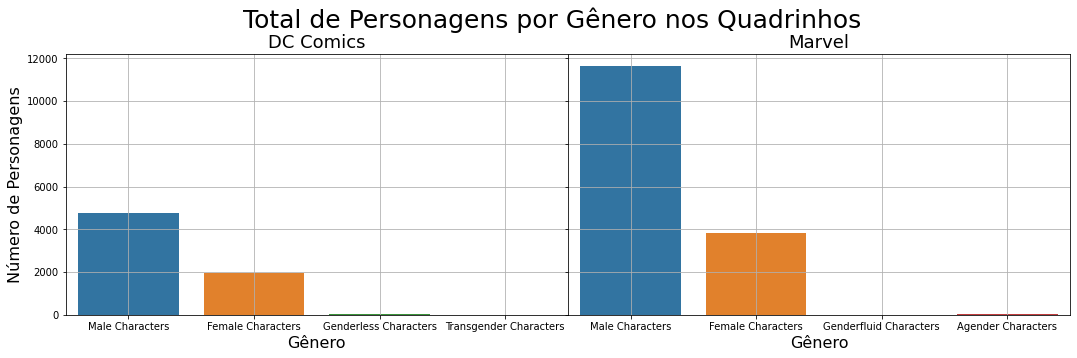

In [8]:
#@title
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,5),sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
fig.subplots_adjust(top=0.85)
plt.suptitle('Total de Personagens por Gênero nos Quadrinhos', fontsize=25)

sns.countplot(x=dadosDC['SEX'], ax = ax0)
ax0.set_title('DC Comics', fontsize=18)
ax0.grid(True)

sns.countplot(x=dadosMarvel['SEX'], ax = ax1,)
ax1.set_title('Marvel', fontsize=18)
ax1.grid(True)

ax0.set_ylabel("Número de Personagens", fontsize=16)
ax0.set_xlabel("Gênero", fontsize=16)
ax1.set_ylabel("")
ax1.set_xlabel("Gênero", fontsize=16)

Como podemos ver acima, em ambas editoras o número de homens é bem maior do que o número de mulheres. 

Um detalhe interessante de se observar é a diferença na quantidade de personagens nas editoras, a Marvel passa do dobro de personagens em relação à DC então é lógico que na Marvel há mais mulheres, porém, isso não significa que a Marvel ganhe da DC quando se trata de representatividade feminina e para termos uma comparação justa precisamos observar as proporções:

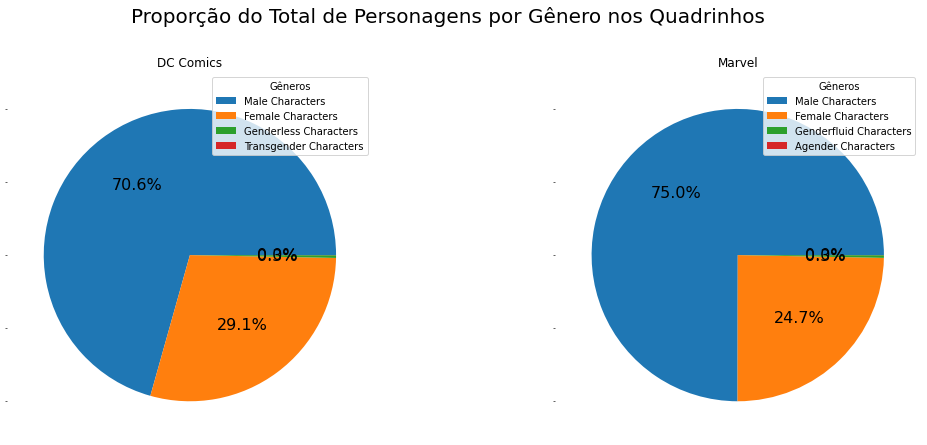

In [9]:
#@title
#Demonstrando % de personagens por gênero com Pie Chart
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True)
fig.subplots_adjust(top=0.85)
plt.suptitle('Proporção do Total de Personagens por Gênero nos Quadrinhos', fontsize=20)

#Guardando os gêneros na coluna SEX para colocar na labels das legendas
sexDC = dadosDC.query("SEX != ''")["SEX"].unique() 
sexMarvel = dadosMarvel["SEX"].unique() 

#-----------

#Piechart DC Comics
dadosDC["SEX"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','','',''], ax = ax0)
ax0.set_title('DC Comics')
ax0.legend(title='Gêneros', labels=['Male Characters', 'Female Characters', 'Genderless Characters', 'Transgender Characters'], loc='upper right',)
ax0.set_ylabel("")

#Piechart Marvel
dadosMarvel["SEX"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','','',''], ax = ax1)
ax1.set_title('Marvel')
ax1.legend(title='Gêneros', labels=['Male Characters', 'Female Characters', 'Genderfluid Characters', 'Agender Characters'], loc='upper right',)

E voilà! Ponto para a DC que tem mais personagens femininas em relação aos personagens masculinos dentro de seu universo!

###Quantas personagens foram criadas por ano?

Text(0.5, 0, 'Ano')

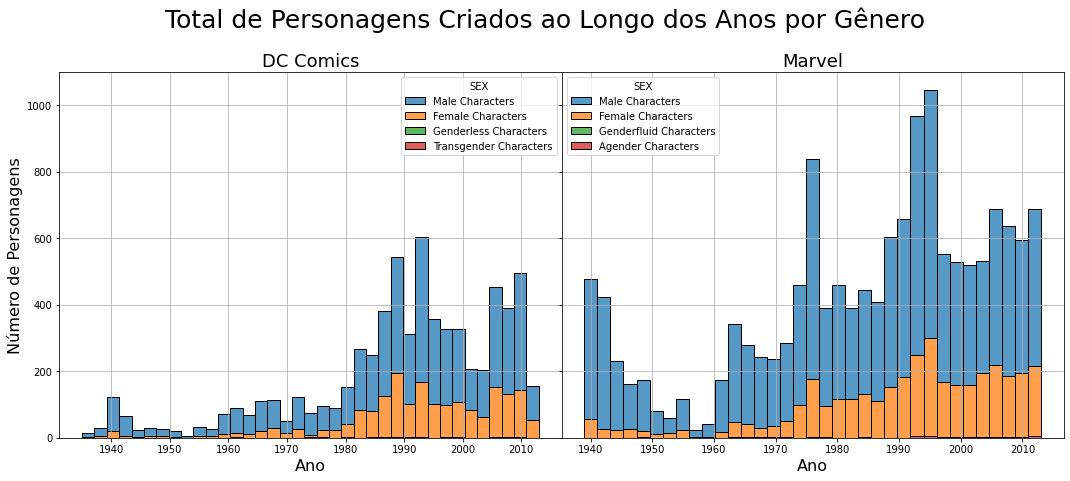

In [10]:
#@title
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
fig.subplots_adjust(top=0.85)
plt.suptitle('Total de Personagens Criados ao Longo dos Anos por Gênero', fontsize=25)

sns.histplot(data=dadosDC, x="YEAR", ax = ax0, hue="SEX", multiple="stack")
ax0.set_title('DC Comics', fontsize=18)
ax0.grid(True)

sns.histplot(data=dadosMarvel, x="Year", ax = ax1, hue="SEX", multiple="stack")
ax1.set_title('Marvel', fontsize=18)
ax1.grid(True)

ax0.set_ylabel("Número de Personagens", fontsize=16)
ax0.set_xlabel("Ano", fontsize=16)
ax1.set_ylabel("Número de Personagens", fontsize=16)
ax1.set_xlabel("Ano", fontsize=16)

Pelos gráficos acima, vemos que em ambas editoras há um aumento significativo de personagens femininas sendo criadas por volta dos anos 80 em diante. Como já esclarecemos antes a ilusão que a Marvel passa com seus números.

Para comparar justamente as duas editoras precisamos olhar as proporções, mas antes, vejamos um diagrama:

Text(0.5, 0, 'Gênero')

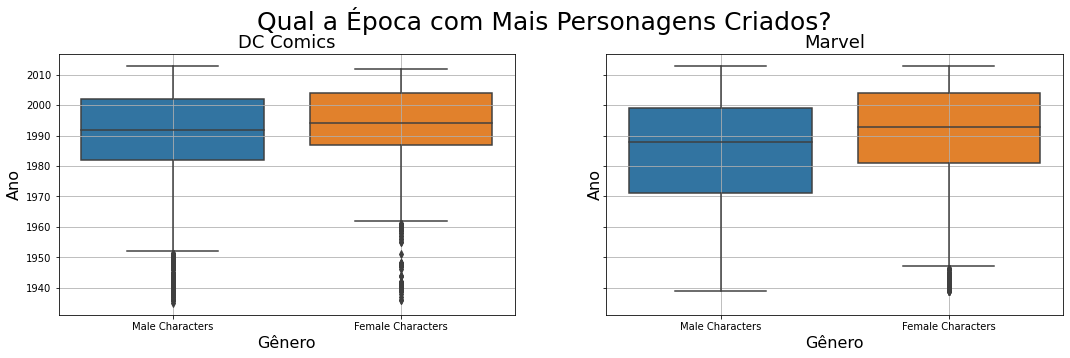

In [11]:
#@title
charsDC = dadosDC.query("SEX == 'Female Characters' | SEX == 'Male Characters'")
charsMarvel = dadosMarvel.query("SEX == 'Female Characters' | SEX == 'Male Characters'")


fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,5),sharey=True)
fig.subplots_adjust(top=0.85)
plt.suptitle('Qual a Época com Mais Personagens Criados?', fontsize=25)

sns.boxplot(x="SEX", y="YEAR", data=charsDC, ax=ax0)
ax0.set_title('DC Comics', fontsize=18)
ax0.grid(True)

sns.boxplot(x="SEX", y="Year", data=charsMarvel, ax=ax1)
ax1.set_title('Marvel', fontsize=18)
ax1.grid(True)

ax0.set_ylabel("Ano", fontsize=16)
ax0.set_xlabel("Gênero", fontsize=16)
ax1.set_ylabel("Ano", fontsize=16)
ax1.set_xlabel("Gênero", fontsize=16)

A ideia aqui é deixar mais nítido em que épocas temos o maior número de personagens criados. Por isso estamos usando o Diagrama de Caixa que trabalha com distribuições para analisar médias. 

Pegando a DC como exemplo, a caixa azul começa um pouco depois dos anos 80 e termina um pouco depois dos anos 2.000, isso significa que a editora teve mais personagens masculinos sendo criados entre as décadas de 80 e 2.000 e dentro desse intervalo de tempo o pico se encontra no começo da década de 90 representado pela linha preta dentro da caixa azul.

No caso das mulheres, passa-se a criar personagens femininas em massa um pouco antes da década de 90 até a metade da década dos anos 2000. O pico se encontra na métade da década dos anos 90.

Já a Marvel passa a criar personagens masculinos em massa logo no começo da década de 70 e acaba nos anos 2.000, o pico se encontra um pouco antes dos anos 90.

A quantidade de personagens femininas se intensifica no começo da década de 80 e temina também na metade da década dos anos 2.000, o pico se encontra pouco antes da metade da década de 90.
 
É curioso ver que em ambas as editoras, além do número de personagens femininas ser menor, a janela de tempo em que foram criadas em massa também é menor comparado aos personagens masculinos.

Agora voltemos a olhar o gráfico anterior, mas com as proporções no eixo y:

Text(0.5, 0, 'Ano')

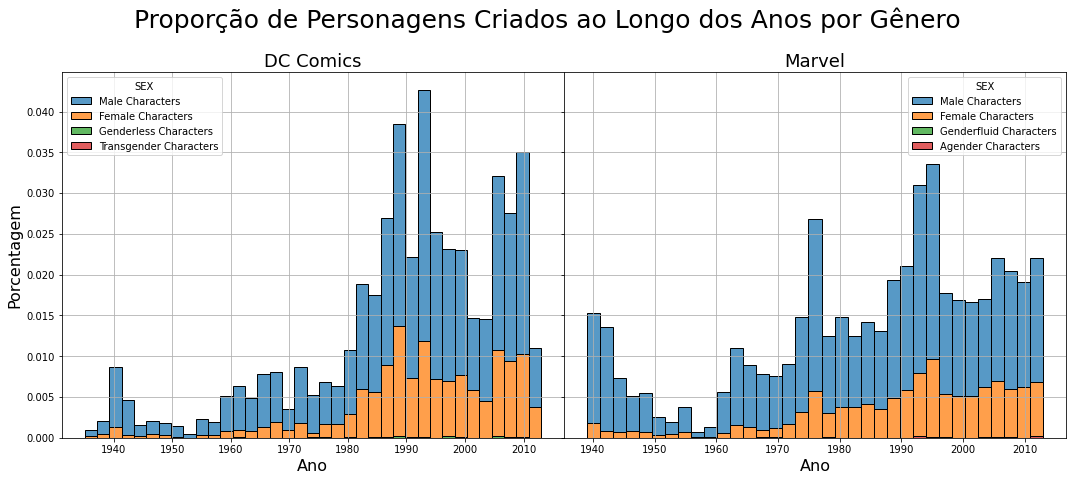

In [12]:
#@title
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
fig.subplots_adjust(top=0.85)
plt.suptitle('Proporção de Personagens Criados ao Longo dos Anos por Gênero', fontsize=25)

sns.histplot(data=dadosDC, x="YEAR", ax = ax0, hue="SEX", multiple="stack", stat="density")
ax0.set_title('DC Comics', fontsize=18)
ax0.grid(True)

sns.histplot(data=dadosMarvel, x="Year", ax = ax1, hue="SEX", multiple="stack",stat="density")
ax1.set_title('Marvel', fontsize=18)
ax1.grid(True)

ax0.set_ylabel("Porcentagem", fontsize=16)
ax0.set_xlabel("Ano", fontsize=16)
ax1.set_ylabel("Porcentagem", fontsize=16)
ax1.set_xlabel("Ano", fontsize=16)

No lugar dos anos temos as porcentagens no eixo Y. Se olharmos o intervalo de tempo analisados nos diagramas anteriores, temos a confirmação de que os anos 80-2000 e 70-2000 foram os anos que mais tiveram mais personagens criados na DC e Marvel respectivamente, mas o pico que temos de personagens femininas é abaixo dos 15%. 

##Será que é mais interessante escrever sobre homens?

Essas fontes de dados tem a coluna "APPEARANCES" que totaliza em quantas histórias em quadrinhos um personagem apareceu.

A contagem não leva em consideração em quantas páginas de um quadrinho ele aparece, apenas se considera SE ele participa da história para contar como uma aparição.

Sabendo desse aspecto, selecionei os 10 primeiros personagens com o maior número de aparições em uma tabela com: Nome, Total de Aparições, Gênero e Ano de Estreia do personagem.

Adianto que os dados à seguir evidênciam o quanto 
Olhar para esses dados dessa forma evidencia algumas curiosidades:

### Mulher Maravilha: o pilar menos prestigiado

Superman, Batman e Mulher Maravilha, são os 3 pilares do universo DC. Eles ganharam esse título dos fãs que os consideram os personagens mais fortes, mais icônicos e que mesmo sendo criados nos anos iniciais da editora conseguiram se manter relevantes até hoje.

Pois bem, a tabela nos mostra que do trio, o Batman é quem tem mais aparições dentro do universo, logo atrás vem o Superman e pela lógica, a próxima da lista seria a Mulher Maravilha, mas ela aparece em 6º lugar. 

A questão é: quem estaria ocupando o 3º lugar do pódio? Um personagem criado **18 anos depois** da Mulher Maravilha:

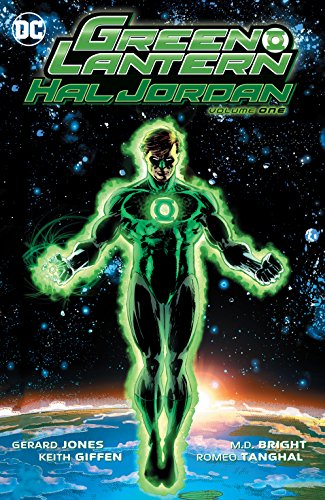

**Veja a tabela completa:**

In [ ]:
#@title
dadosDC.iat[3,1] = "Commissioner Gordon (James Gordon)"
dadosDC.iat[4,1] = "Robin /Nightwing (Richard Dick Grayson)"
dadosDC.iat[7,1] = "Red Robin (Timothy Drake)"
dadosDC.iat[8,1] = "Black Canary (Dinah Laurel Lance)"

dadosDC.loc[0:9, ['name','APPEARANCES','SEX','YEAR']]

,name,APPEARANCES,SEX,YEAR
0,Batman (Bruce Wayne),3093.0,Male Characters,1939.0
1,Superman (Clark Kent),2496.0,Male Characters,1986.0
2,Green Lantern (Hal Jordan),1565.0,Male Characters,1959.0
3,Commissioner Gordon (James Gordon),1316.0,Male Characters,1987.0
4,Robin /Nightwing (Richard Dick Grayson),1237.0,Male Characters,1940.0
5,Wonder Woman (Diana Prince),1231.0,Female Characters,1941.0
6,Aquaman (Arthur Curry),1121.0,Male Characters,1941.0
7,Red Robin (Timothy Drake),1095.0,Male Characters,1989.0
8,Black Canary (Dinah Laurel Lance),1075.0,Female Characters,1969.0
9,Flash (Barry Allen),1028.0,Male Characters,1956.0


### Bat-Manos no Hall da Fama

Como você já deve ter visto na tabela, quem está nas posições acima da Mulher Maravilha são 2 personagens bem conhecidos no universo do Batman: o Comissário Gordon e o primeiro Robin.

O mais curioso é o fato de que o Comissário Gordon nem é um super herói e ainda assim tem mais histórias do que a Mulher Maravilha. 

Também destaco o 8º lugar com mais um membro da Bat-Família, o segundo Robin, Tim Drake.

Percebu a falta de alguém nesse top 10? Cadê a Batgirl? Não é curioso termos homens do universo do Batman menos a Batgirl que é uma personagem conhecida na cultura pop?

O mesmo fenômeno acontece na Marvel e com uma família de verdade!

### Quarteto Fantasticamente Desigual

No top 10 da Marvel temos grande parte da formação de Vingadores mais famosa. A Víuva Negra não está nesse meio, mas podemos dar o benefício de que talvez ela não fosse tão famosa e o MCU que quis dar mais destaque à personagem.

Também temos 2 representantes dos X-men: Wolverine e Ciclope, mas não temos nenhuma das 3 das personagens femininas mais famosas do grupo: Jean Gray, Tempestade e Vampira.

Mas veja que interessante, temos todos os membros do Quarteto Fantástico, menos a **Mulher Invisível**. Curioso, pois em tese os 4 membros deveriam ter a mesma quantidade de aparições, mas na prática há uma nítida diferença entre eles, veja:

*   6º lugar: Benjamin Grimm, o Coisa
*   7º lugar: Reed Richards, o Senhor Incrível
*   10º lugar: Jonathan Storm, o Tocha Humana

Veja também a tabela na íntegra:

In [ ]:
#@title
dadosMarvel.iat[5,1] = "The Thing (Benjamin Grimm)"
dadosMarvel.iat[6,1] = "Mister Fantastic (Reed Richards)"
dadosMarvel.iat[8,1] = "Cyclops (Scott Summers)"
dadosMarvel.iat[9,1] = "Human Torch (Jonathan Storm)"

dadosMarvel.loc[0:9, ['name','APPEARANCES','SEX','Year']]

,name,APPEARANCES,SEX,Year
0,Spider-Man (Peter Parker),4043.0,Male Characters,1962.0
1,Captain America (Steven Rogers),3360.0,Male Characters,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",3061.0,Male Characters,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",2961.0,Male Characters,1963.0
4,Thor (Thor Odinson),2258.0,Male Characters,1950.0
5,The Thing (Benjamin Grimm),2255.0,Male Characters,1961.0
6,Mister Fantastic (Reed Richards),2072.0,Male Characters,1961.0
7,Hulk (Robert Bruce Banner),2017.0,Male Characters,1962.0
8,Cyclops (Scott Summers),1955.0,Male Characters,1963.0
9,Human Torch (Jonathan Storm),1934.0,Male Characters,1961.0


### Como em toda boa família, a mulher fica em casa

Para vermos a Mulher Invisível nessa lista teríamos de estendê-la para a vermos na 12ª colocação.

Mas o que causa esse diferença de aparições entre eles? Simples! São as vezes em que os membros do Quarteto aparecem em histórias de outros grupos de heróis como os Avengers ou os X-Men.

Não podemos esquecer que o Quarteto Fantástico é uma família de verdade! A Susan Storm é esposa do Sr. Fantástico e irmã do Tocha Humana e ambos saem em mais aventuras com outros heróis do que ela. É difícil não fazer um paralelo com a crença patriarcal de que mulheres de família devem ficar mais em casa do que os homens dessa mesma família.

Também não é ao acaso a possibilidade de fazer esse paralelo uma vez que apesar de serem histórias ficcionais nada impede de possuírem reflexos da realidade já que quadrinhos são feitos por pessoas reais e conscientemente ou inconscientemente elas vão colocar ao menos uma fração da realidade que elas conhecem dentro de sua história.

Se a Susan Storm é vítima de uma editora de quadrinhos machista ou se os escritores são vítimas de uma cultura machista, infelizmente não é possível concluir apenas com os dados que temos agora, mas fica o questionamento para refletirmos.

### E o Fandom brasileiro? Será que ele é machista?

Na curiosidade de verificar a diferença na quantidade de afiliações entre os personagens do Quarteto, fiz o engano de buscar essa informação na Wiki brasileira em português ao invés da wiki original usada para alimentar a fonte de dados.

Em tese, as páginas das Wikis brasileiras deveriam ser traduções das originais em inglês e é o que ocorre geralmente, mas há páginas que traduzem o conteúdo parcialmente ocultando algumas partes.

À seguir tem as páginas da Wiki em português de cada personagem, clique e veja a disparidade na quantidade de informações entre os personagens:

*   https://marvel.fandom.com/pt-br/wiki/Benjamin_Grimm_(Terra-616)
*   https://marvel.fandom.com/pt-br/wiki/Reed_Richards_(Terra-616)
*   https://marvel.fandom.com/pt-br/wiki/Jonathan_Storm_(Terra-616)
*   https://marvel.fandom.com/pt-br/wiki/Susan_Storm_(Terra-616)

Viu quem tem menos informações? Justamente a Mulher Invisível. É ridículo a quantidade minúscula de informações disponíveis, é menos que o básico!

Pegando como exemplo a informação que eu estava buscando que era a quantidade de afiliações de cada personagem, para os homens só preciso olhar a ficha técnica de cada um mas não acho a informação na página da Susan Storm, pois ela nem tem uma ficha técnica! 

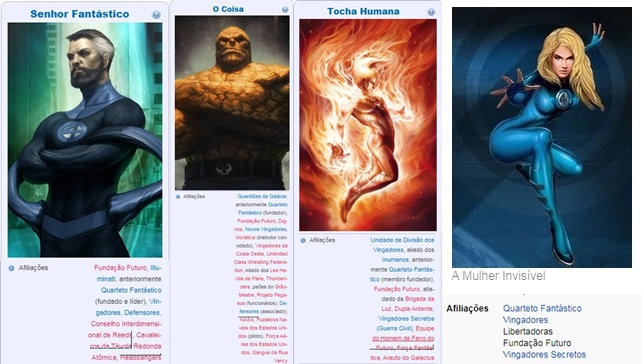

Para tal informação preciso recorrer à Wikipédia, que vale dizer, curiosamente a página em português também possui uma quantidade de informações inferior à página em inglês:

Por que esse descaso com a Mulher Invisível na Wiki e Wikipédia brasileiras? Barreira de linguagem não é, pois como vimos, as páginas dos membros masculinos são praticamente traduções completas das originais, então por que não traduziram o conteúdo dela? Ainda mais se tratando da Wiki que tem o objetivo de agrupar todas as informações possíveis sobre qualquer assunto!

Lógico que esse ponto não é o suficiente para dizermos que o fandom brasileiro da Marvel é machista, mas traz indícios e é sempre produtivo averiguar esses tipos de casos para perceber o quanto as convenções da realidade se transportam para o entretenimento.

## Mocinhas e Bandidas

Vamos olhar para o alinhamento moral de nossas meninas? Será que o gênero influência na hora dos escritores definirem o alinhamento para um novo personagem? 

Primeiro de tudo, vejamos a distribuição de mocinhos e bandidos entre as editoras independente do gênero:

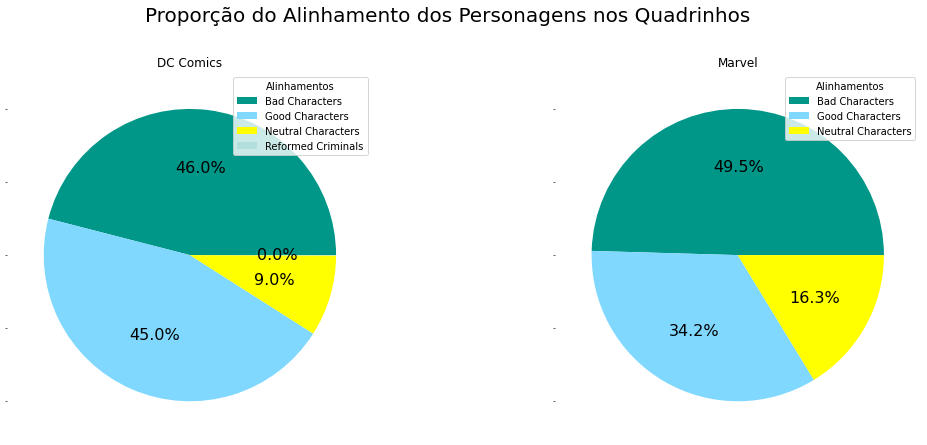

In [ ]:
#@title
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True)
fig.subplots_adjust(top=0.85)
plt.suptitle('Proporção do Alinhamento dos Personagens nos Quadrinhos', fontsize=20)

colors = ['#009688', '#80D8FF', '#FFFF00', '#B2DFDB']

#-----------

#Piechart DC Comics
dadosDC["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','','',''], colors=colors, ax = ax0)
ax0.set_title('DC Comics')
ax0.legend(title='Alinhamentos', labels=['Bad Characters', 'Good Characters','Neutral Characters','Reformed Criminals'], loc='upper right')
ax0.set_ylabel("")

#Piechart Marvel2
dadosMarvel["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','',''], colors=colors, ax = ax1)
ax1.set_title('Marvel')
ax1.legend(title='Alinhamentos', labels=['Bad Characters', 'Good Characters','Neutral Characters'], loc='upper right',)

Percebe-se que ambas tem uma quantidade maior de vilões, mas a proporção é maior na Marvel que também tem mais personagens neutros.

Agora vamos olhar para essas mesmas proporções mas separando por gênero:

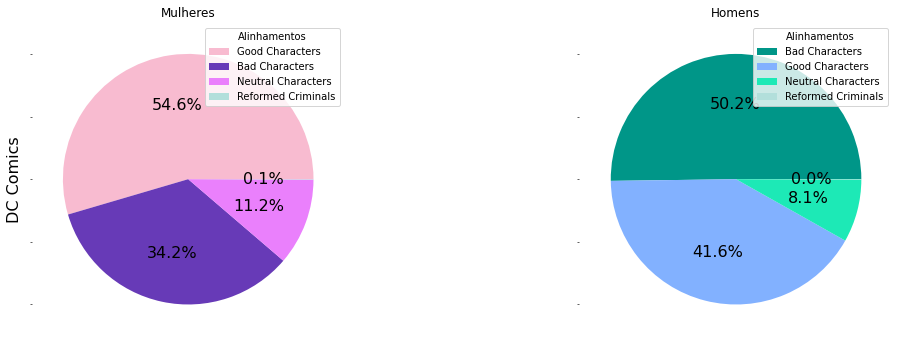

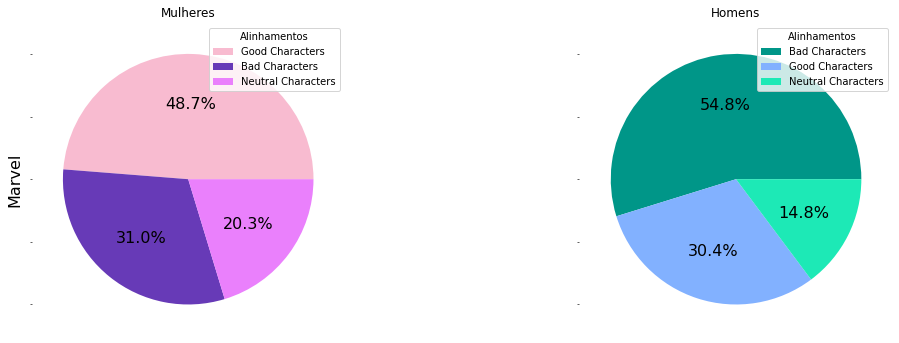

In [ ]:
#@title
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,6),sharey=True)
fig.subplots_adjust(top=0.85)
 
colors1 = ['#F8BBD0', '#673AB7', '#EA80FC', '#B2DFDB']
colors2 = ['#009688', '#82B1FF', '#1DE9B6', '#B2DFDB']

#-----------

#Piechart Mulheres
dadosDC.query("SEX == 'Female Characters'")["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','','',''], colors=colors1, ax = ax0)
ax0.set_title('Mulheres')
ax0.legend(title='Alinhamentos', labels=['Good Characters','Bad Characters','Neutral Characters','Reformed Criminals'], loc='upper right')
ax0.set_ylabel("DC Comics", fontsize=16)


#Piechart Homens
dadosDC.query("SEX == 'Male Characters'")["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','','',''], colors=colors2, ax = ax1)
ax1.set_title('Homens')
ax1.legend(title='Alinhamentos', labels=['Bad Characters', 'Good Characters','Neutral Characters','Reformed Criminals'], loc='upper right',)

#--------------------------

fig, (ax2, ax3) = plt.subplots(nrows=1,ncols=2,figsize=(18,6),sharey=True)
fig.subplots_adjust(top=0.85)

#Piechart Mulheres
dadosMarvel.query("SEX == 'Female Characters'")["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','',''], colors=colors1, ax = ax2)
ax2.set_title('Mulheres')
ax2.legend(title='Alinhamentos', labels=['Good Characters','Bad Characters','Neutral Characters'], loc='upper right')
ax2.set_ylabel("Marvel", fontsize=16)

#Piechart Homens
dadosMarvel.query("SEX == 'Male Characters'")["ALIGN"].value_counts().plot.pie(autopct="%.1f%%", fontsize=16, labels=['','',''], colors=colors2, ax = ax3)
ax3.set_title('Homens')
ax3.legend(title='Alinhamentos', labels=['Bad Characters', 'Good Characters','Neutral Characters'], loc='upper right',)

Vamos para o óbvio: independente da editora, a maioria dos homens são vilões e a maioria das mulheres são heróinas.

"Mas não é positivo as mulheres serem vistas como figuras de bondade, justiça e perseverança em forma de heroínas?" 

Deveria ser, mas se torna problemático à partir do momento que a maioria dos homens nessa mídia são vilões, pois reforça o estereótipo de que a mulher é uma figura bondosa e sensata por natureza enquanto que o homem é falível e fácil de ser corrompido por natureza.

"E qual o problema nisso?"

O problema está em reforçar características e comportamentos exigidos às mulheres na sociedade. A ideia de que mulheres são melhores que homens por natureza parece boa à primeira vista, mas se torna um pesadelo ao não permitir que a mulher tenha a oportunidade de falhar já que a falha é considerada uma característica masculina. A sociedade exige uma perfeição por parte da mulher para que ela se mostre no mesmo nível que o homem, cujo pode falhar quantas vezes quiser. Vamos explorar mais esse tema com o nosso próximo gráfico:

Text(0.5, 0, 'Alinhamento Moral')

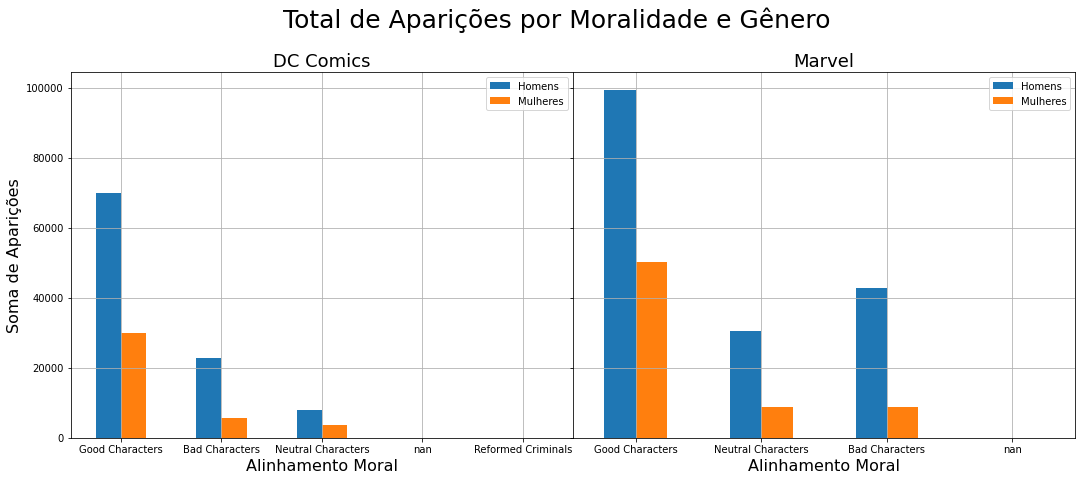

In [5]:
#@title
#Guardando fonte de dados apenas com os registros ao qual "SEX" seja Male ou Female 
boys_girls_dc = dadosDC.query("SEX == 'Female Characters' | SEX == 'Male Characters'")
boys_girls_marvel = dadosMarvel.query("SEX == 'Female Characters' | SEX == 'Male Characters'")

#Salvando a fonte de dados com a coluna "ALIGN" como indice para somar o total de aparições no nível do índice, ou seja, o alinhamento
baseAlignDC = boys_girls_dc.set_index("ALIGN")
baseAlignMarvel = boys_girls_marvel.set_index("ALIGN")

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
fig.subplots_adjust(top=0.85)
plt.suptitle('Total de Aparições por Moralidade e Gênero', fontsize=25)


#Gráfico DC Comics
aparicoesHomensDC = baseAlignDC.query("SEX == 'Male Characters'")["APPEARANCES"].sum(level="ALIGN")
aparicoesMulheresDC = baseAlignDC.query("SEX == 'Female Characters'")["APPEARANCES"].sum(level="ALIGN")

alinhamentosDC = boys_girls_dc["ALIGN"].unique()

moralPorGeneroDC = pd.DataFrame({
    'Homens' : aparicoesHomensDC,
    'Mulheres' : aparicoesMulheresDC},
    index = alinhamentosDC
)

ax0.set_title('DC Comics', fontsize=18)
moralPorGeneroDC.plot.bar(rot=0, ax=ax0)
ax0.grid(True)
ax0.set_ylabel("Soma de Aparições", fontsize=16)
ax0.set_xlabel("Alinhamento Moral", fontsize=16)

#Gráfico Marvel
aparicoesHomensMarvel = baseAlignMarvel.query("SEX == 'Male Characters'")["APPEARANCES"].sum(level="ALIGN")
aparicoesMulheresMarvel = baseAlignMarvel.query("SEX == 'Female Characters'")["APPEARANCES"].sum(level="ALIGN")

alinhamentosMarvel = boys_girls_marvel["ALIGN"].unique()

moralPorGeneroMarvel = pd.DataFrame({
    'Homens' : aparicoesHomensMarvel,
    'Mulheres' : aparicoesMulheresMarvel},
    index = alinhamentosMarvel
)

ax1.set_title('Marvel', fontsize=18)
moralPorGeneroMarvel.plot.bar(rot=0, ax=ax1)
ax1.grid(True)
ax1.set_ylabel("")
ax1.set_xlabel("Alinhamento Moral", fontsize=16)

Nesse gráfico estou somando o total de aparições de todos os personagens aglomerados por alinhamento moral e gênero.

Comparando as somatórias dos homens, vemos que são os heróis quem tem mais aparições e as mulheres seguem a mesma lógica mas veja como a barra das heroínas chegam na metade da barra dos heróis enquanto que as barras de vilãs e personagens neutras chegam nem perto da metade em relação aos homens!

O ponto é, apesar dos heróis também terem mais aparições do que os vilões e personagens neutros vemos que existe mais diversidade em questão de alinhamento moral enquanto as mulheres são majoritariamente boas. Esse tipo de visibilidade reforça a ideia de que a mulher é sinônimo de boas virtudes enquanto que o homem é mais falho e corruptível.

Lembremos também que a segunda metade da década de 80 é marcada por uma ruptura na narrativa dos quadrinhos ao qual alguns autores passam a abordar o heroísmo com uma lente mais complexa e cinza. A divisão de Bem e Mal não é mais tão nítido quanto água e vinho e sendo assim, os heróis passam a ter seus reais desejos questionados enquanto que os vilões passam a ter mais humanidade dentro de suas motivações. Para quem é fã é fácil lembrar de Batman, o Cavalheiro das Trevas e WatchMen marcando essa época... Curiosamente são histórias focadas em homens.








## Considerações Finais

A ideia inicial dessa pesquisa é ser provocativa e nos fazer pensar sobre representatividade com um olhar mais crítico.

Ainda há o que explorar nessas fontes de dados para conseguir estatísticas menos generalistas e adicionar mais complexidade nesse tema, mas os dados aqui demonstrados já são o suficiente para refletirmos em como as mulheres são retratadas nos quadrinhos.

O motivo para eu não ir mais à fundo nessa pesquisa é porque irei participar de um evento de aprendizagem intensiva durante uma semana, a [Imersão Dados da Alura](https://www.alura.com.br/imersao-dados).

Passado esse evento decidirei se continuarei com essa pesquisa ou se começarei uma nova com o tema de masculidade na perspectiva dos própris homens (Veja aqui a fonte de dados que será usada).

O fato é que pretendo em algum momento voltar para esse projeto e esmiuçar ainda mais coisas dele, portanto, segue a lista dos próximos tópicos que pretendo abordar futuramente:

*   Explorar a coluna "ALIVE" que define se o personagem está vivo, morto ou doente e verificar o nível de diferença no total de doentes e mortos por gênero e alinhamento moral.
*   Explorar a coluna "ID" que indica se o personagem tem identidade secreta ou não e através dessa coluna verificar a possibilidade de mensurar a quantidade de personagens que são pessoas comuns como a Lois Lane ou a Tia May e aprofundar ainda mais a questão sobre alinhamento moral por gênero, pois tenho a teoria de que há mais mulheres comuns de boa índole nos quadrinhos do que homens com essas características. 
*   Explorar as colunas "EYE" e "HAIR" para alguns insights sobre o visual dos heróis e discutir também representatividade racial. Infelizmente não poderemos ir à fundo por falta de informações sobre características físicas dentro dessas fontes de dados, mas é possível trazer algumas discussões à tona.
*   Por fim, explorar a coluna "GSM" que indica se o personagem faz parte de alguma minoria social, especificamente da comunidade LGBTQIA+ para ir além e abordar a questão da representatividade dessa comunidade nos quadrinhos!

Espero que essa pesquisa faça refletir sobre a nossa realidade, como ela influência a cultura pop e vice-versa!

Até a próxima!

.

*Versão 2021.05.01*






